In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Laplace-space linear transform for derivative of input signal with low-pass filter
$$F(s) = \frac{s}{\tau_f s + 1}$$

Z-transformed (discrete-time) version of the above transform
$$F(z) = \frac{2-2z^{-1}}{(T_s+2*\tau_f)+(T_s - 2*\tau_f)z^{-1}}$$

In [2]:
Ts = 1 # sampling period, generally can assume 1
tf = .8*Ts # low pass filter time constant, recommend >0.5*Ts ( <0.5 produces ringing)

# numerator and denominator for low-passed differentiating filter:
num = [2, -2]
den = [(Ts+2*tf), (Ts-2*tf)]

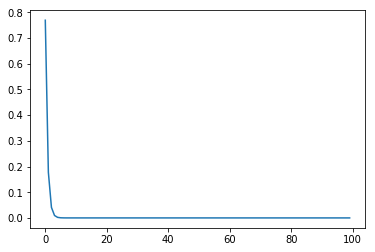

In [3]:
# should go to zero with step response, since derivative is zero after initial step
t = range(0,100)
C = 1
u = [C]*len(t) # step signal, going up to C right at t=0
filtered_signal = signal.lfilter(num, den, u)
plt.plot(t, filtered_signal)
plt.show()

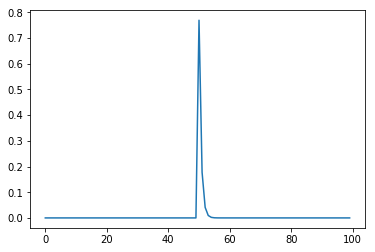

In [4]:
# should go to zero with step response, since derivative is zero after initial step
C = 1
numZeros = int(len(t)/2)
u = [0]*numZeros
u = [*u,*[C]*(len(t)-numZeros)] # step signal, going up to C after t=numZeros
filtered_signal = signal.lfilter(num, den, u)
plt.plot(t, filtered_signal)
plt.show()

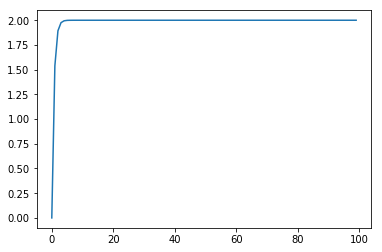

In [5]:
# should go to constant level of C since input is constantly increasing at C units/timestep
C = 2
u = [x*C for x in range(len(t))] # input signal, just constantly increasing at C units/timestep
filtered_signal = signal.lfilter(num, den, u)
plt.plot(t, filtered_signal)
plt.show()

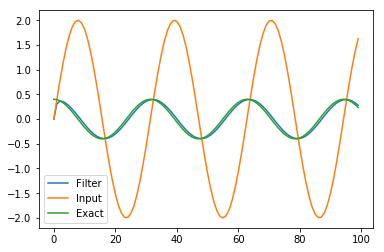

In [6]:
# should go to constant level of C since input is constantly increasing at C units/timestep
C = 2
S = 0.2
u = C*np.sin(S*np.array(t)) # input signal, sine
filtered_signal = signal.lfilter(num, den, u)
plt.plot(t, filtered_signal)
plt.plot(t, u)
plt.plot(t, C*S*np.cos(S*np.array(t)))
plt.legend(['Filter', 'Input', 'Exact'])
plt.show()
